In [1]:
import gym
import time
import matplotlib.pyplot as plt
from matplotlib import animation

# mode = 'human'

In [ ]:
env_name = 'CartPole-v0'
env = gym.make(env_name, render_mode='human')
env = gym.wrappers.RecordVideo(env, 'video')  # 视频将保存在 ./video 目录

In [6]:
observation, info = env.reset()
done = False
total_reward = 0

while not done:
    action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(action)  # 新版返回5个值
    done = terminated or truncated
    total_reward += reward
    time.sleep(0.5)
print(total_reward)

MoviePy - Building video /Users/solidify/Git/Reinforce Learning/gym/video/rl-video-episode-0.mp4.
MoviePy - Writing video /Users/solidify/Git/Reinforce Learning/gym/video/rl-video-episode-0.mp4



MoviePy - Done !
MoviePy - video ready /Users/solidify/Git/Reinforce Learning/gym/video/rl-video-episode-0.mp4


34.0


# render save

In [2]:
env_name = 'CartPole-v0'
env = gym.make(env_name, render_mode='rgb_array')


/Users/solidify/miniconda3/envs/rl_env/lib/python3.11/site-packages/gym/envs/registration.py:555: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(


In [4]:
observation, info = env.reset()
done = False
total_reward = 0

frames = []

while not done:
    frames.append(env.render())
    action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(action)  # 新版返回5个值
    done = terminated or truncated
    total_reward += reward
    time.sleep(0.5)
env.close()
print(total_reward)

10.0


In [5]:
len(frames)

10

In [6]:
frames[0].shape

(400, 600, 3)

In [ ]:
def display_frames_to_video(frames):
    # 创建画布，将第一张图片作为第一帧
    plt.figure(figsize=(frames[0].shape[0]/72, frames[0].shape[1]/72), dpi=72)
    plt.axis('off')
    patch = plt.imshow(frames[0])

    def animate(i):
        patch.set_data(frames[i])

    ani = animation.FuncAnimation(
        plt.gcf(),  # get current figure 获取当前的画布
        animate,
        frames=range(len(frames)),
        interval=50     # 两帧之间的时间间隔（毫秒）
    )
    ani.save('cartpole.gif', writer='imagemagick')

    

In [ ]:
# def display_frames_to_video(frames):
#     # 创建画框，将第一张图片作为第一帧
#     plt.figure(figsize=(frames[0].shape[0]/72, frames[0].shape[1]/72), dpi=72)
#     plt.axis('off')
#     patch = plt.imshow(frames[0])

#     def animate(frame):
#         patch.set_data(frame)

#     ani = animation.FuncAnimation(
#         plt.gcf(),
#         animate,
#         frames=frames[1:],
#         interval=50
#     )
#     ani.save('cartpole.gif', writer='imagemagick')

    

MovieWriter imagemagick unavailable; using Pillow instead.


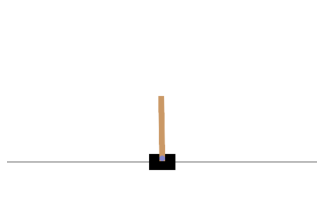

In [8]:
display_frames_to_video(frames)